<a href="https://colab.research.google.com/github/Emmaculate2020/WK4-IP-HYPOTHESIS-TESTING-AND-ANALYSIS-IN-PYTHON/blob/master/WK4_Data_Science_Core_IP_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing and other Analysis

#1. Loading and Reading the dataset

In [1]:
# Loading our dataset and necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

autolib = pd.read_csv("autolib_daily_events_postal_code.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2. Checking the data

In [2]:
# To get the first few rows of the dataset

autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [3]:
# To get the last few rows of the dataset

autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [4]:
# To get the number of rows and columns of our dataset

autolib.shape

(16085, 13)

In [5]:
# We get the column datatypes

autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [9]:
# We get the summary statistics of the dataset

autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


# 3. Tidying the dataset

In [11]:
autolib['day_type'].unique()

array(['weekday', 'weekend'], dtype=object)

In [10]:
autolib.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

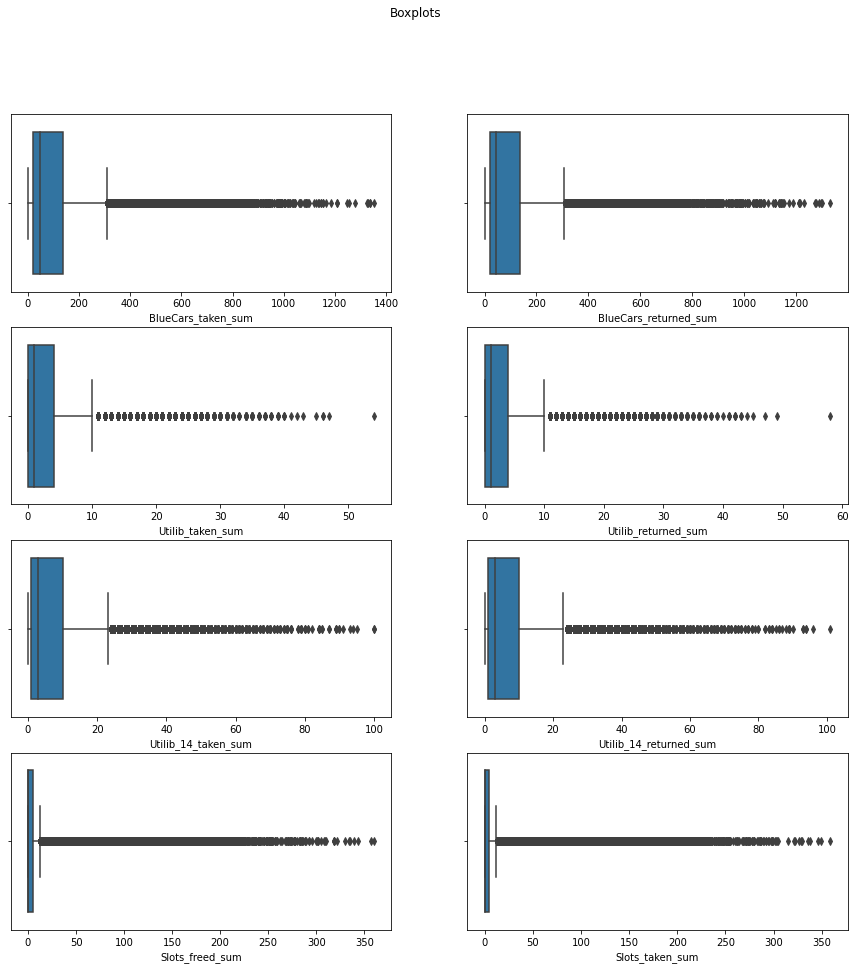

In [18]:
# Checking for Outliers
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(15, 15))
fig.suptitle('Boxplots')
sns.boxplot(autolib['BlueCars_taken_sum'], ax=ax1)
sns.boxplot(autolib['BlueCars_returned_sum'], ax=ax2)
sns.boxplot(autolib['Utilib_taken_sum'], ax=ax3)
sns.boxplot(autolib['Utilib_returned_sum'], ax=ax4)
sns.boxplot(autolib['Utilib_14_taken_sum'], ax=ax5)
sns.boxplot(autolib['Utilib_14_returned_sum'], ax=ax6)
sns.boxplot(autolib['Slots_freed_sum'], ax=ax7)
sns.boxplot(autolib['Slots_taken_sum'], ax=ax8)
plt.show()

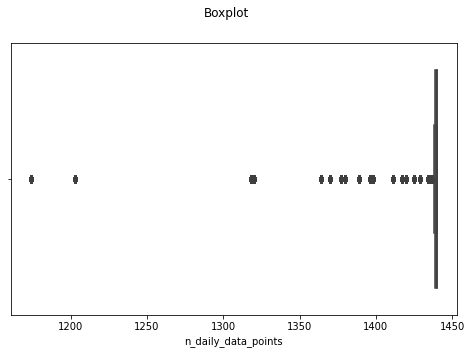

In [25]:
# Checking for Outliers
fig, ((ax1)) = plt.subplots(1,1, figsize=(8, 5))
fig.suptitle('Boxplot')
sns.boxplot(autolib['n_daily_data_points'], ax=ax1)
plt.show()

In [26]:
# Identifying the Missing Data
#

autolib.isnull().sum()

# Out dataset has no null values

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [29]:
autolib.drop_duplicates()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


# 4. Univariate Analysis

4.1 Frequency table for the categorical variables

In [30]:
# Creating our frequency table
# 
autolib.day_type.value_counts()

weekday    11544
weekend     4541
Name: day_type, dtype: int64

In [31]:
# Creating another frequency table
# 
autolib.dayOfWeek.value_counts()

0    2374
1    2363
6    2274
4    2271
3    2268
2    2268
5    2267
Name: dayOfWeek, dtype: int64

In [32]:
autolib.groupby(['day_type','dayOfWeek'])['dayOfWeek'].count()

day_type  dayOfWeek
weekday   0            2374
          1            2363
          2            2268
          3            2268
          4            2271
weekend   5            2267
          6            2274
Name: dayOfWeek, dtype: int64

# 4.2. Bar charts

In [33]:
autolib.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

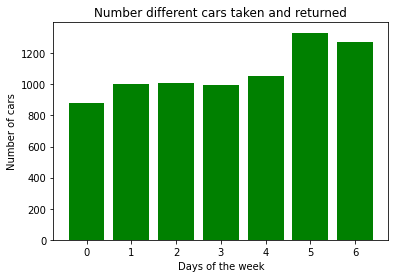

In [57]:

x = autolib['BlueCars_returned_sum']


days = autolib['dayOfWeek']
 

plt.bar(days, x, color='green')

# Labelling our x axis
plt.xlabel("Days of the week")

# Labelling our y axis
plt.ylabel("Number of cars")

# Giving a title to our Bar chart
plt.title("Number Bluecars taken on different days")

# Displaying our chart
plt.show()

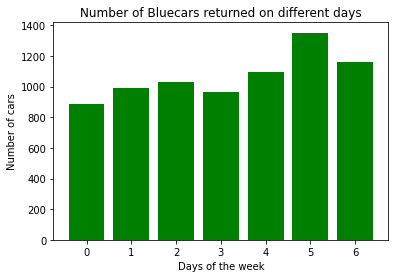

In [77]:
x = autolib['BlueCars_taken_sum']


days = autolib['dayOfWeek']
 

plt.bar(days, x, color='green')

# Labelling our x axis
plt.xlabel("Days of the week")

# Labelling our y axis
plt.ylabel("Number of cars")

# Giving a title to our Bar chart
plt.title("Number of Bluecars returned on different days")

# Displaying our chart
plt.show()

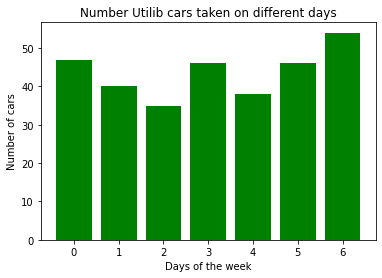

In [79]:
x = autolib['Utilib_taken_sum']


days = autolib['dayOfWeek']
 

plt.bar(days, x, color='green')

# Labelling our x axis
plt.xlabel("Days of the week")

# Labelling our y axis
plt.ylabel("Number of cars")

# Giving a title to our Bar chart
plt.title("Number Utilib cars taken on different days")

# Displaying our chart
plt.show()

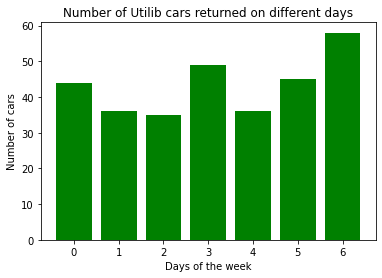

In [83]:
x = autolib['Utilib_returned_sum']


days = autolib['dayOfWeek']
 

plt.bar(days, x, color='green')

# Labelling our x axis
plt.xlabel("Days of the week")

# Labelling our y axis
plt.ylabel("Number of cars")

# Giving a title to our Bar chart
plt.title("Number of Utilib cars returned on different days")

# Displaying our chart
plt.show()

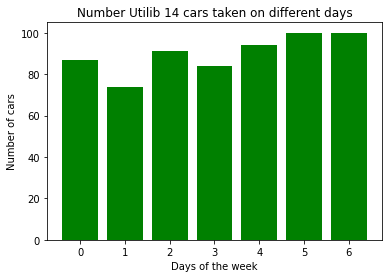

In [80]:
x = autolib['Utilib_14_taken_sum']


days = autolib['dayOfWeek']
 

plt.bar(days, x, color='green')

# Labelling our x axis
plt.xlabel("Days of the week")

# Labelling our y axis
plt.ylabel("Number of cars")

# Giving a title to our Bar chart
plt.title("Number Utilib 14 cars taken on different days")

# Displaying our chart
plt.show()

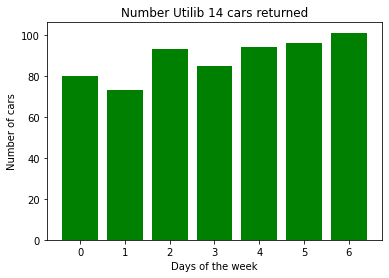

In [81]:
x = autolib['Utilib_14_returned_sum']


days = autolib['dayOfWeek']
 

plt.bar(days, x, color='green')

# Labelling our x axis
plt.xlabel("Days of the week")

# Labelling our y axis
plt.ylabel("Number of cars")

# Giving a title to our Bar chart
plt.title("Number Utilib 14 cars returned")

# Displaying our chart
plt.show()

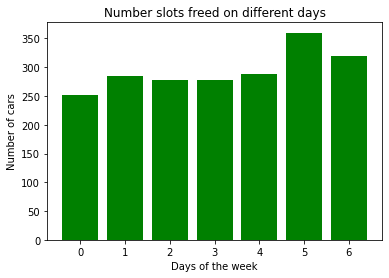

In [84]:
x = autolib['Slots_freed_sum']


days = autolib['dayOfWeek']
 

plt.bar(days, x, color='green')

# Labelling our x axis
plt.xlabel("Days of the week")

# Labelling our y axis
plt.ylabel("Number of cars")

# Giving a title to our Bar chart
plt.title("Number slots freed on different days")

# Displaying our chart
plt.show()

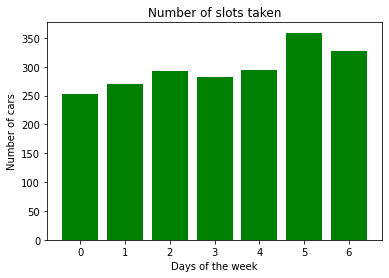

In [110]:
x = autolib['Slots_taken_sum']


days = autolib['dayOfWeek']
 

plt.bar(days, x, color='green')

# Labelling our x axis
plt.xlabel("Days of the week")

# Labelling our y axis
plt.ylabel("Number of cars")

# Giving a title to our Bar chart
plt.title("Number of slots taken")

# Displaying our chart
plt.show()

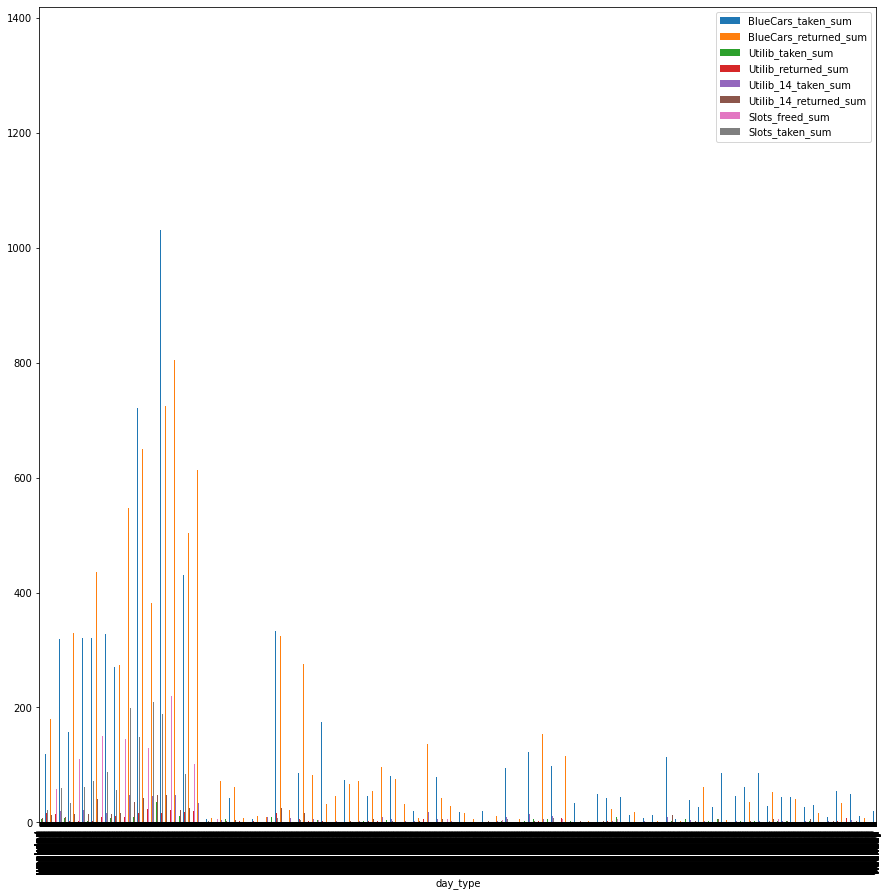

In [44]:
autolib.plot(x='day_type', y=['BlueCars_taken_sum','BlueCars_returned_sum','Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum','Slots_freed_sum','Slots_taken_sum'], kind="bar", figsize=(15, 15))


# 5. Bivariate Analysis

In [71]:
# Dropping unnecessary columns and converting day_type column to numerical values

autolib1 = autolib.drop("date", axis=1)

autolib1.replace({'day_type': {'weekday': 1, 'weekend': 2}}, inplace  = True )

autolib1.head()

,Postal code,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1440,0,1,110,103,3,2,10,9,22,20
1,75001,1438,1,1,98,94,1,1,8,8,23,22
2,75001,1439,2,1,138,139,0,0,2,2,27,27
3,75001,1320,3,1,104,104,2,2,9,8,25,21
4,75001,1440,4,1,114,117,3,3,6,6,18,20


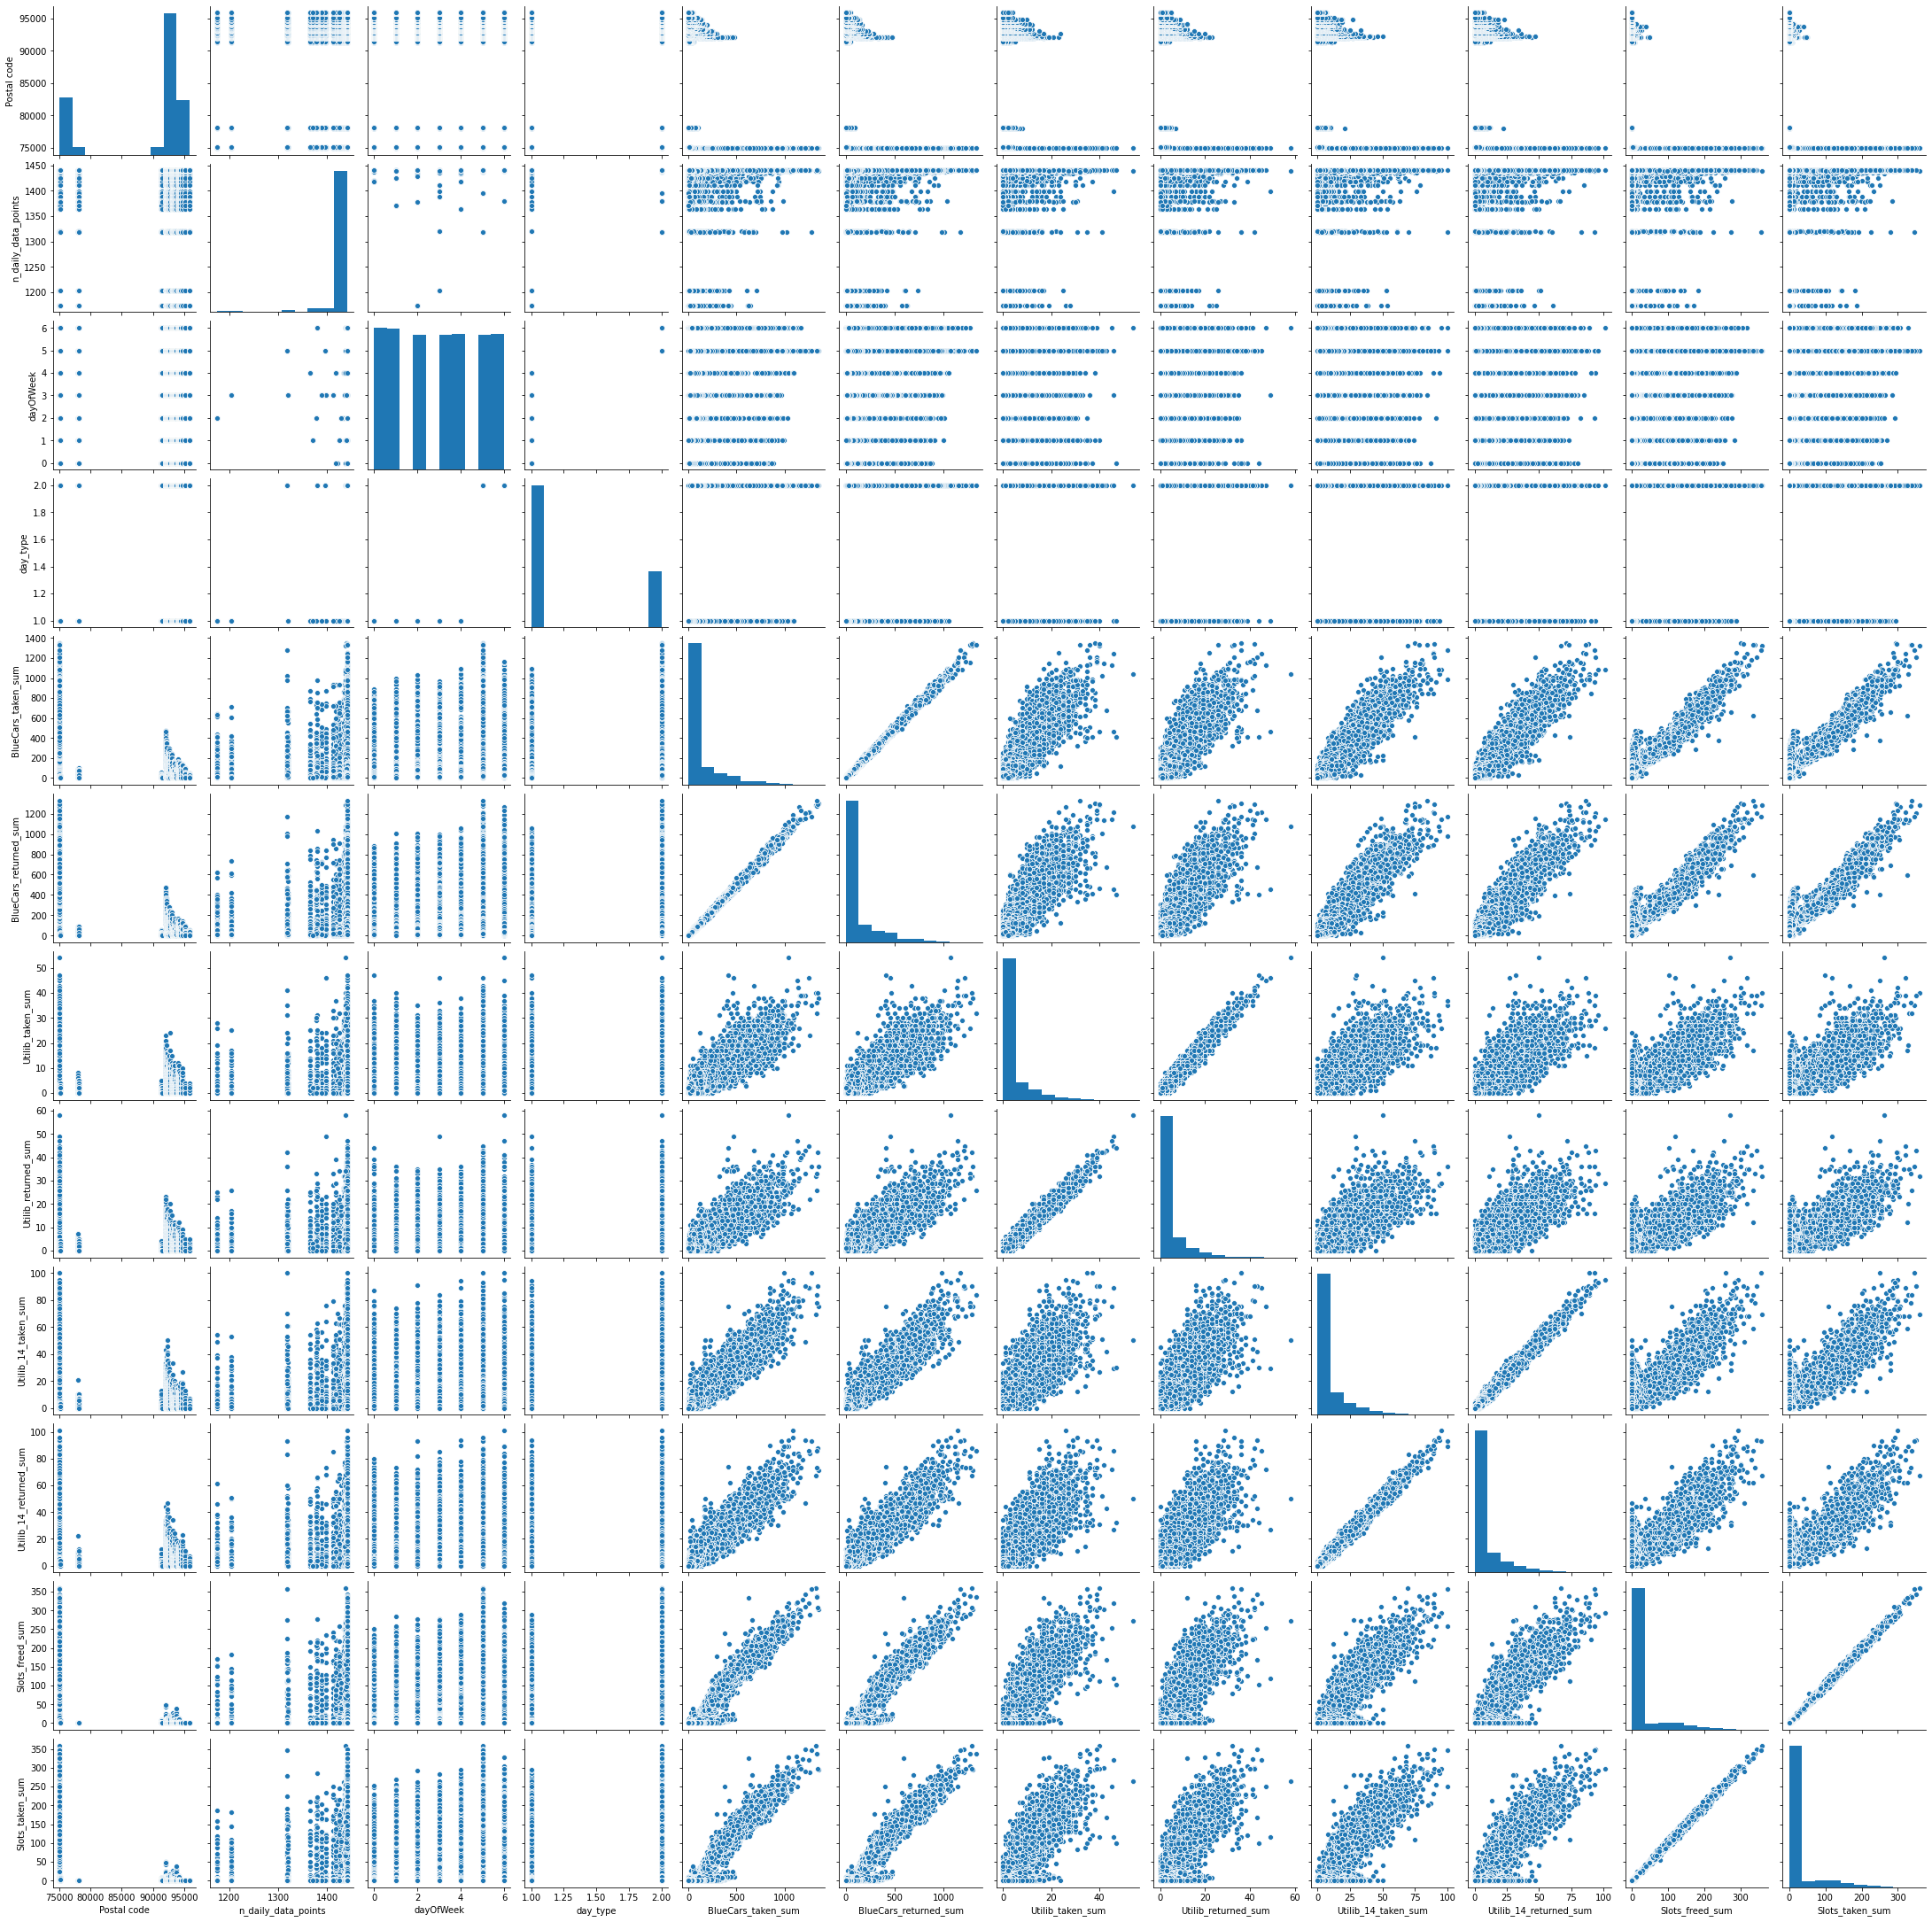

In [72]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(autolib1)
plt.show()

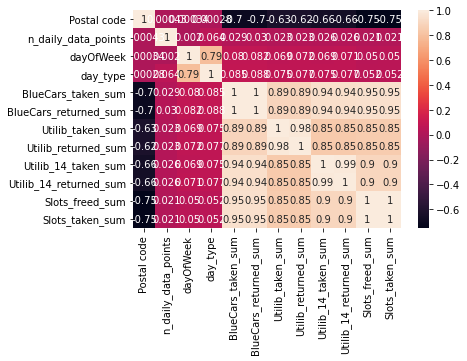

In [73]:
# Using heatmap to plot the correlation between the variables

sns.heatmap(autolib1.corr(),annot=True)
plt.show()

In [137]:
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# 6. Hypothesis Testing

In [86]:
autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


# Question 1
- The number of Blue cars taken is higher during the weekend. Test done at 95% level of confidence

In [109]:
# H0 : The number of Blue cars taken daily is the same 
# H1 : The number of Blue cars taken during weekends is higher than during the week

# The population mean number of blue cars taken during the week is

autolib.groupby(['day_type'])['BlueCars_taken_sum'].mean()

# The mean number of blue cars during the weekneb is 151.090068

autolib.groupby(['day_type'])['BlueCars_taken_sum'].sum() # the number of bluecars during the weekend is 686100

autolib['BlueCars_taken_sum'].mean()

from statistics import stdev

x = autolib['BlueCars_taken_sum'] # the population standard deviation
stdev = statistics.stdev(x)

# The average number of blue cars taken throughout the week is 125.92695057506994

population_mean = 125.92695057506994
sample_mean = 151.090068
alpha = 0.05
sample_size = 686100

import scipy.stats as stats
import math
from scipy import stats as st

zscore = (sample_mean - population_mean) / (stdev /math.sqrt(sample_size))
print(zscore)

prob = 1 - stats.norm.cdf(zscore)
print(prob)
# prob is the p_value

if prob > 0.05:
  print("We do not reject the null hypothesis")

else:
  print("We reject the null hypothesis")


112.40513939894255
0.0
We reject the null hypothesis


- There is enough evidence to support the claim that the number of blue cars hired during the weekend is higher than during week days.
- We use Z test in this case because we have population mean, population standard deviation and the sumple size is greater than 30.

# Question 2
- There are free slots on any day of the week, though some people claim that there are more free slots during the weekdays. We test this at 95% level of significance

In [116]:
# H0 : There are equal number of slots freed on any day of the week
# H1 : There are more slots freesd on week days 

# The population mean for slots freed during the week is

autolib.groupby(['day_type'])['Slots_freed_sum'].mean()

# The mean number of slots freed during weekdays is 20.945166

autolib.groupby(['day_type'])['Slots_freed_sum'].sum() # the number of slots freed during the weekend is  241791

autolib['Slots_freed_sum'].mean()

from statistics import stdev

x = autolib['Slots_freed_sum'] # the population standard deviation
stdev = statistics.stdev(x)

# The average number of slots freed throughout the week is 22.62903326080199

population_mean = 22.62903326080199
sample_mean = 20.945166
alpha = 0.05
sample_size =  241791

import scipy.stats as stats
import math
from scipy import stats as st

zscore = (sample_mean - population_mean) / (stdev /math.sqrt(sample_size))
print(zscore)

prob = 1 - stats.norm.cdf(zscore)
print(prob)
# prob is the p_value

if prob > 0.05:
  print("We do not reject the null hypothesis")

else:
  print("We reject the null hypothesis")

-15.886247248382615
1.0
We do not reject the null hypothesis


- There is no enough evidence to support the claim that the number of slots freed are higher during weekdays, therefore we do not reject the null hypothesis.
- We use Z test in this case because we have population mean, population standard deviation and the sumple size is greater than 30.

# Question 3
- On average people's preferences to different cars is assumed to be equal. A group of customers claim that most people prefer Blue cars to Utilib on any day. We test this claim at 95% significance level. Our test was done on a sample of 30 cars. 

In [177]:
# H0 : Number of bluecars taken  =  Number of Utilib cars taken
# H0 : Number of bluecars taken  >  Number of Utilib cars taken

y = autolib['Utilib_taken_sum'].mean() # is the population mean 

# we get a sample size of 30cars in each case
a = autolib['BlueCars_taken_sum'].sample(n = 150).mean() # is the sample mean
print(a)

b = autolib['Utilib_taken_sum'].sample(n = 150) # is the sample standard deviation
print(b)
z = statistics.stdev(b)

population_mean = y
sample_mean = a
sample_size = 150
sample_stdev = z


zscore = (sample_mean - population_mean) / (sample_stdev /math.sqrt(sample_size))
print(zscore)

prob = 1 - stats.norm.cdf(zscore)
print(prob)
# prob is the p_value

if prob > 0.05:
  print("We do not reject the null hypothesis")

else:
  print("We reject the null hypothesis")

132.45333333333335
14209     2
11785     0
9995      4
9454      4
3624      0
         ..
11541     2
14661     0
13912     1
10905     0
9514     10
Name: Utilib_taken_sum, Length: 150, dtype: int64
258.3939523355098
0.0
We reject the null hypothesis


- There is no enough evidence to support the claim that most people prefer the blue cars to utilib on any day during the week.
- We use Z test again because our sample size is greater than 30

# 4. Question 4
- In a recent study based on our dataset, the average number of utilib 14 cars returned to area of postal code 75001 is equal to the ones returned to area of postal code 95880 in a week. One of the employees at Autolib disagrees and says that the it is less than the cars returned at 95880. At 90% significance level, we are going to determine whether is claim is true or not. The test was done on a sample of size 100 cars.

In [170]:
# Ho : Number of utilib 14 cars returned at 75001 = Number of utilib 14 cars returned at 95880
# H1 : Number of utilib 14 cars returned at 75001 < Number of utilib 14 cars returned at 95880

i = autolib[(autolib['Postal code'] == 95880)]['Utilib_14_returned_sum'].mean() # is 1.2243589743589745 which is the population mean

k = statistics.stdev(autolib[(autolib['Postal code'] == 95880)]['Utilib_14_returned_sum'])# is the population standard deviation

y = autolib[(autolib['Postal code'] == 75001)]['Utilib_14_returned_sum'].sample(n = 100).mean() # is the sampe mean
print(y)

mean = i
sigma = k
sample_size = 100
sample_mu = y
alpha = 0.1

# we are goig to calculate the z score for the mean because the sample six=ze is greater than 30

zscore = (sample_mu - mean)/(k / math.sqrt(sample_size))
print(zscore)

prob = 1 - stats.norm.cdf(zscore)
print("The p_value is", prob)
# prob is the p_value

if prob > 0.1:
  print("We do not reject the null hypothesis")

else:
  print("We reject the null hypothesis")


8.74
51.110946905633185
The p_value is 0.0
We reject the null hypothesis


- We reject the null hypothesis. There is enough evidence to support the alternative hypothesis.